In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from operator import add
import seaborn as sns
import os

%matplotlib inline

In [8]:
data = pd.read_csv('CHD_Dataset.csv')
data.drop(['education'], axis=1, inplace=True)
data.head(10)

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [9]:
#total percentage of missing data
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 12.74%


In [10]:
#percentage of missing data per category
total = data.isnull().sum().sort_values(ascending = False)
percent_total = (data.isnull().sum()/data.isnull().count()).sort_values(ascending = False) * 100
missing = pd.concat([total, percent_total], axis = 1, keys=["Total", "Percentage"])
missing_data = missing[missing['Total']>0]
missing_data

,Total,Percentage
glucose,388,9.150943
BPMeds,53,1.250000
totChol,50,1.179245
cigsPerDay,29,0.683962
BMI,19,0.448113
heartRate,1,0.023585


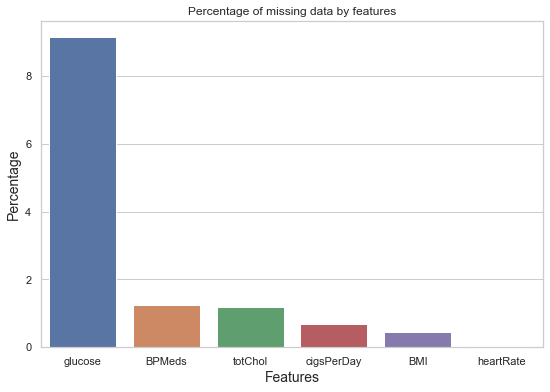

In [11]:
plt.figure(figsize = (9,6))
sns.set(style = "whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data = missing_data)
plt.title('Percentage of missing data by features')
plt.xlabel('Features', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.show()

In [12]:
data.shape

(4240, 15)

In [13]:
data.dropna(axis=0, inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

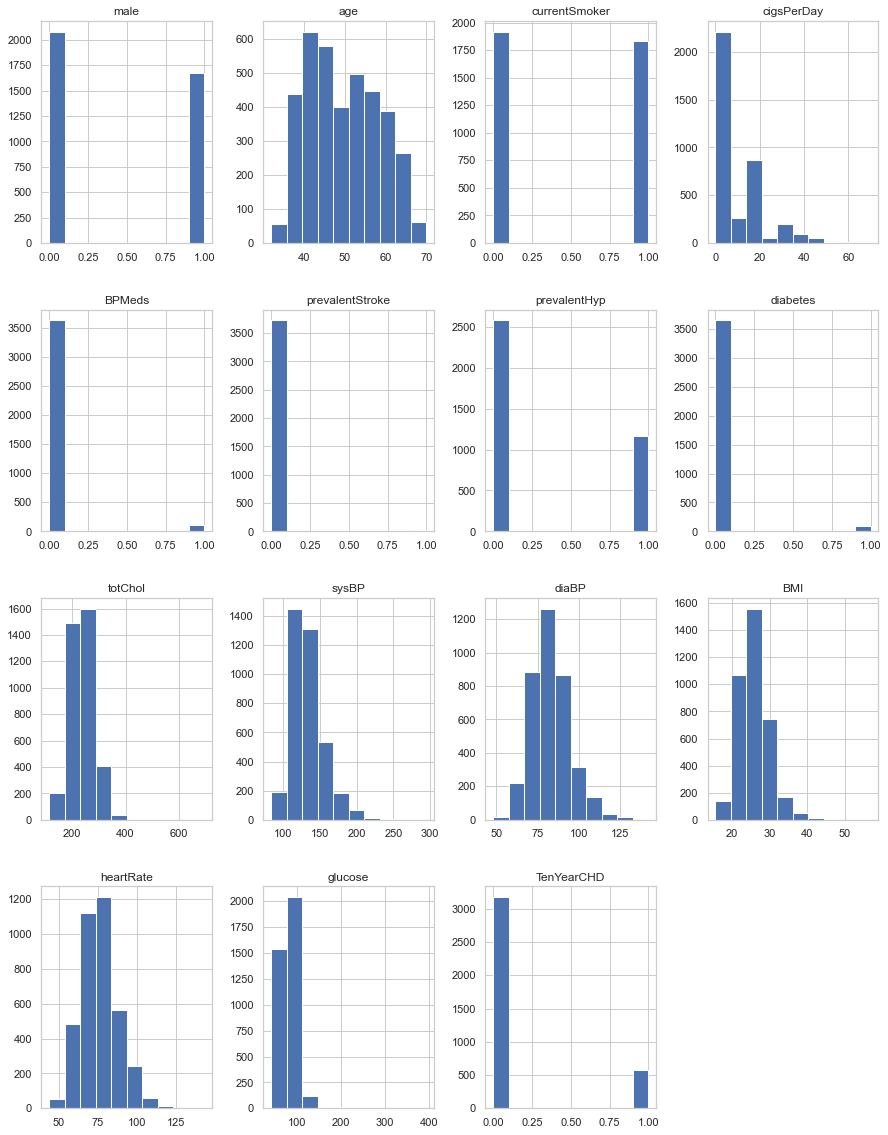

In [14]:
#plot histogram to see the distribution of the data
fig = plt.figure(figsize=(15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show

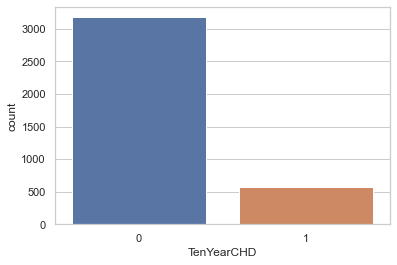

There are 3179 patients without heart disease and 572 patients with heart disease


In [15]:
sns.countplot(x = 'TenYearCHD', data = data)
plt.show()
cases = data.TenYearCHD.value_counts()
print(f"There are {cases[0]} patients without heart disease and {cases[1]} patients with heart disease")

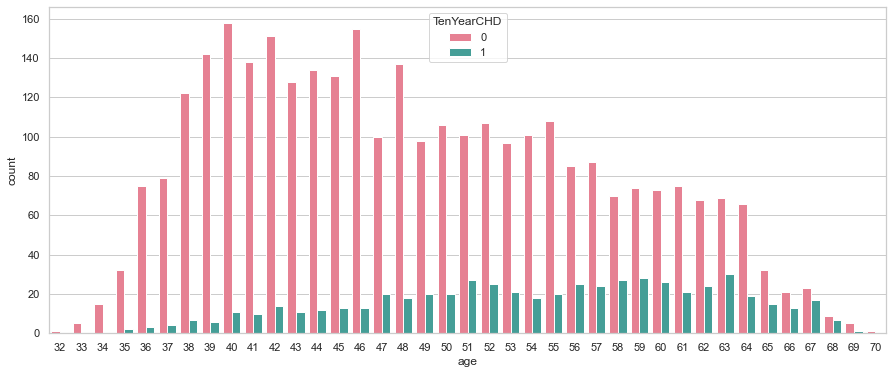

In [16]:
plt.figure(figsize=(15, 6))
sns.countplot(x = 'age', data = data, hue ='TenYearCHD', palette = 'husl')
plt.show()

In [17]:
def stacked_barchart(data, title = None, ylable = None, xlable = None):
  default_colors = ['#008080', '#5f3c41', '#219AD8']
  #from raw value to percentage
  totals = data.sum(axis=1)
  bars = ((data.T/totals)*100).T
  r = list(range(data.index.size))

  #plot
  barWidth = 0.95
  names = data.index.tolist()
  bottom = [0] * bars.shape[0]

  #Create bars
  color_index = 0
  plots = []
  for bar in bars.columns:
    plots.append(plt.bar(r, bars[bar], bottom=bottom, color=default_colors[color_index], edgecolor = 'white', width=barWidth))
    bottom = list(map(add, bottom, bars[bar]))
    color_index = 0 if color_index >= len(default_colors) else color_index + 1

  #Custom x axis
  plt.title(title)
  plt.xticks(r, names)
  plt.xlabel(data.index.name if xlable is None else xlable)
  plt.ylabel(data.columns.name if ylable is None else ylable)
  ax = plt.gca()

  y_labels = ax.get_yticks()
  ax.set_yticklabels([str(y) + '%' for y in y_labels])

  flat_list = [item for sublist in data.T.values for item in sublist]
  for i, d in zip(ax.patches, flat_list):
    data_label = str(d) + "(" + str(round(i.get_height(), 2)) + "%)"
    ax.text(i.get_x()+ 0.45, i.get_y() + 5, data_label, horizontalalignment = 'center', verticalalignment = 'center',
    fontdict = dict(color = 'white', size = 20))

  for item in ([ax.title]):
    item.set_fontsize(27)
  
  for item in ([ax.xaxis.label, ax.yaxis.label] + ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(24)

  legend = ax.legend(plots, bars.columns.tolist(), fancybox = True)
  plt.setp(legend.get_texts(), fontsize = '20')

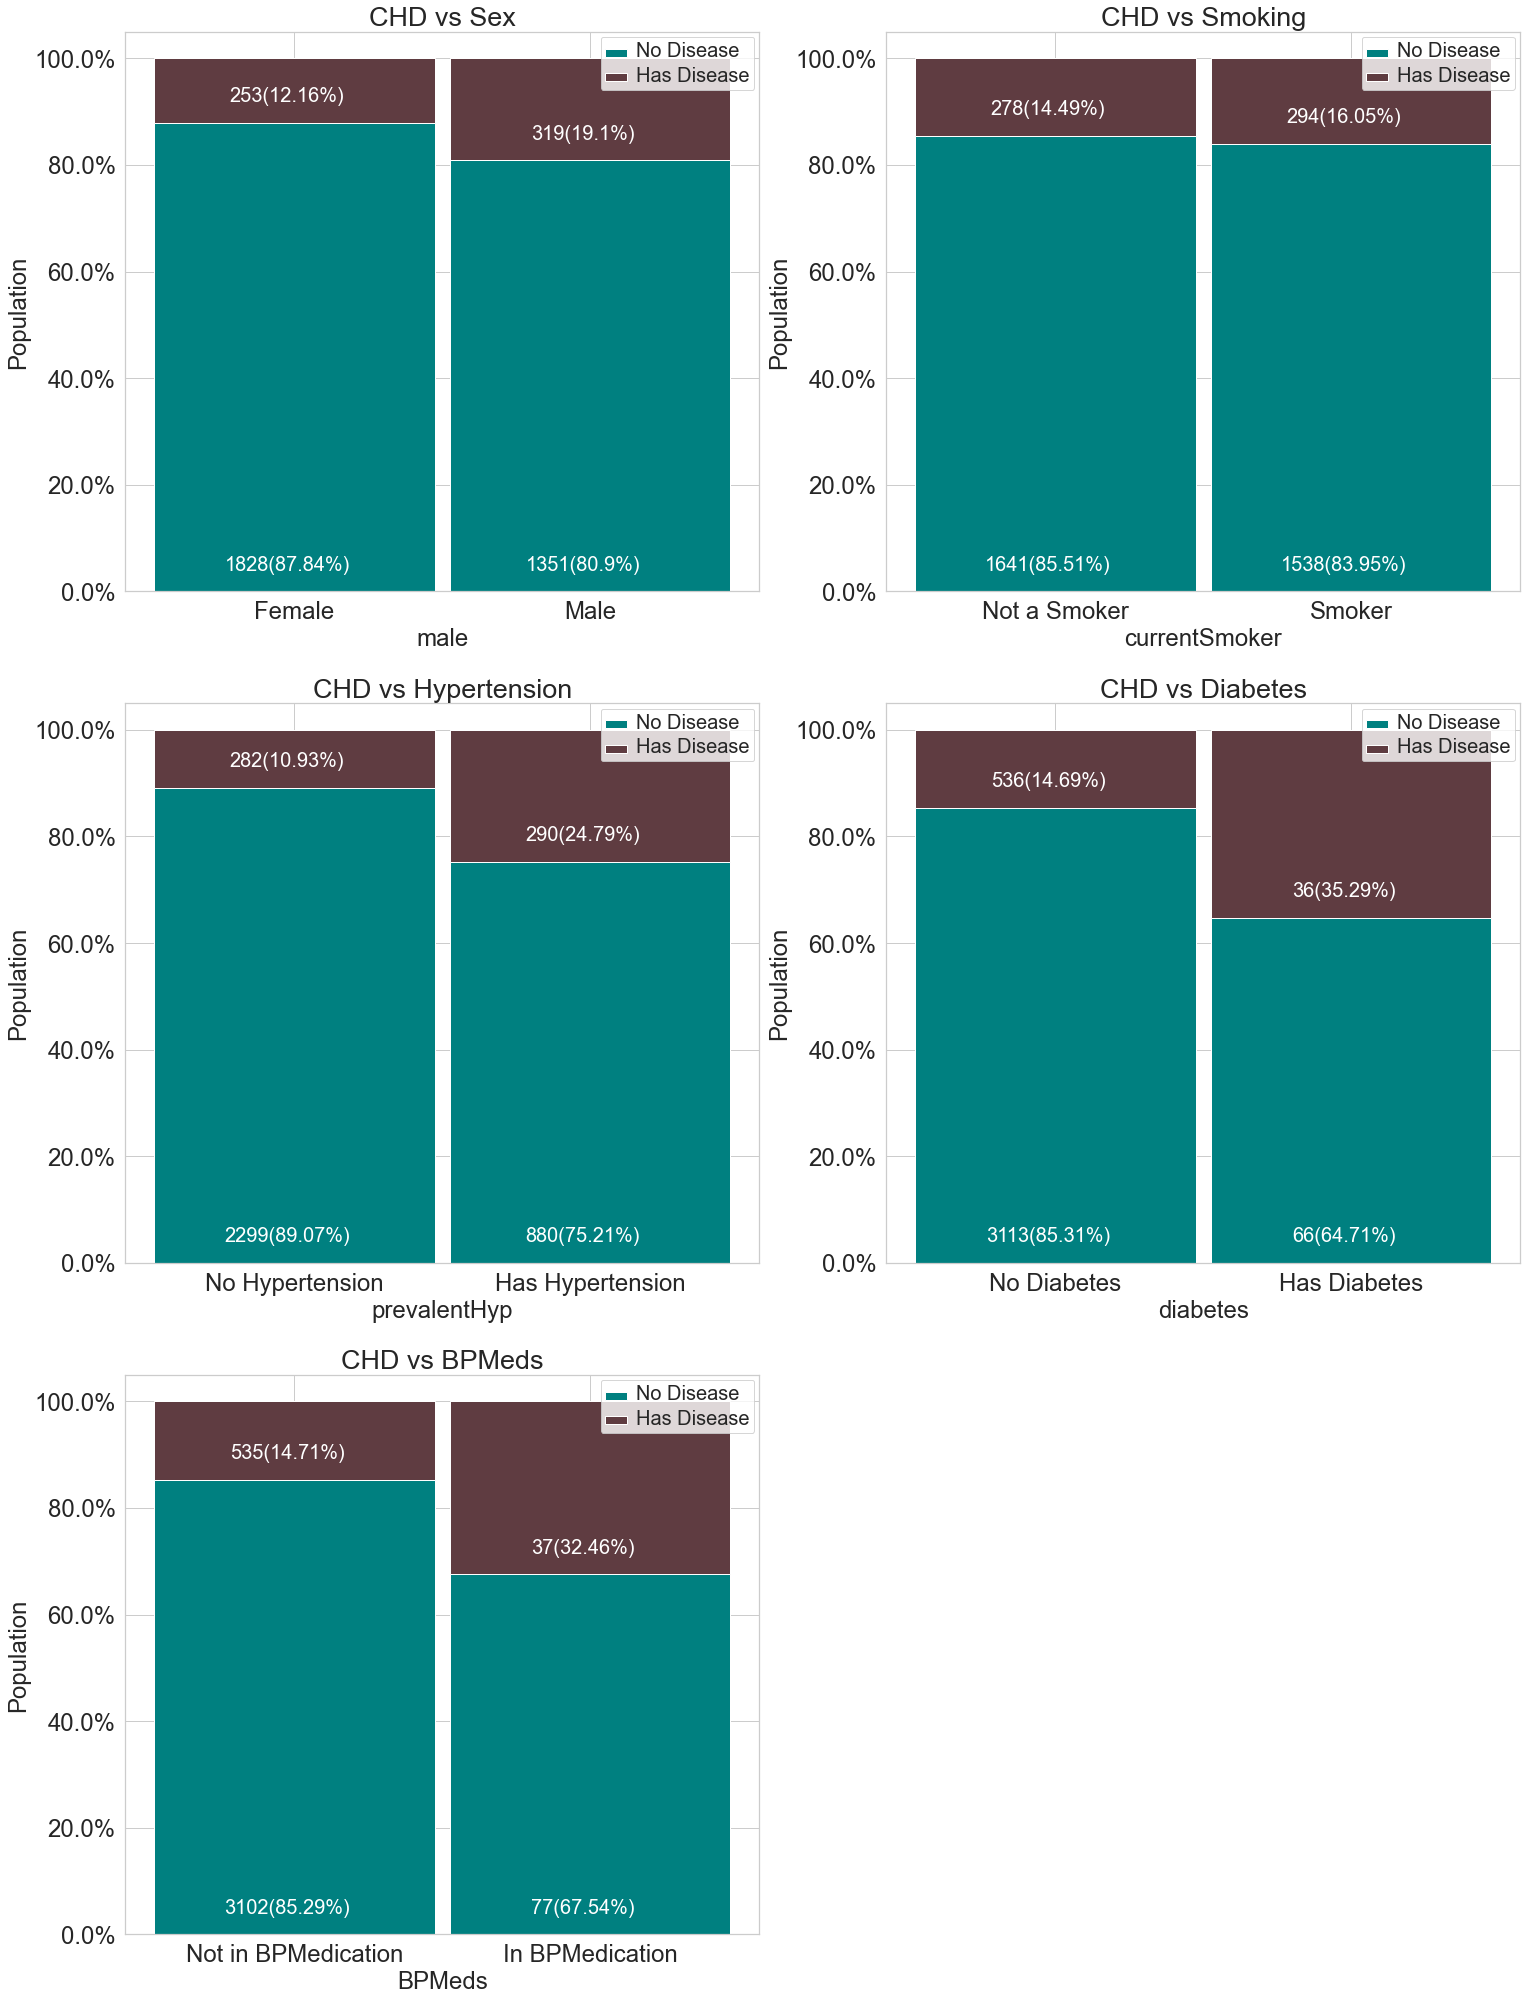

In [18]:
fig = plt.gcf()
fig.set_size_inches(25, 35)
grid_rows = 3
grid_cols = 2

#draw sex vs disease outcome
plt.subplot(grid_rows, grid_cols, 1)
temp = data[['male', 'TenYearCHD']].groupby(['male', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index = {0: 'Female', 1: 'Male'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Sex', ylable = 'Population')

#draw smoking status vs disease outcome
plt.subplot(grid_rows, grid_cols, 2)
temp = data[['currentSmoker', 'TenYearCHD']].groupby(['currentSmoker', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index = {0: 'Not a Smoker', 1: 'Smoker'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Smoking', ylable = 'Population')

#draw hypertension status vs disease outcome
plt.subplot(grid_rows, grid_cols, 3)
temp = data[['prevalentHyp', 'TenYearCHD']].groupby(['prevalentHyp', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index = {0: 'No Hypertension', 1:'Has Hypertension'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Hypertension', ylable = 'Population')

#draw diabetes status vs disease outcome
plt.subplot(grid_rows, grid_cols, 4)
temp = data[['diabetes', 'TenYearCHD']].groupby(['diabetes', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index = {0: 'No Diabetes', 1:'Has Diabetes'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs Diabetes', ylable = 'Population')

#draw BPMedication  status vs disease outcome
plt.subplot(grid_rows, grid_cols, 5)
temp = data[['BPMeds', 'TenYearCHD']].groupby(['BPMeds', 'TenYearCHD']).size().unstack('TenYearCHD')
temp.rename(index = {0: 'Not in BPMedication', 1:'In BPMedication'}, columns={0: 'No Disease', 1: 'Has Disease'}, inplace = True)
stacked_barchart(temp, title = 'CHD vs BPMeds', ylable = 'Population')

<module 'matplotlib.pyplot' from 'C:\\Users\\Lenovo\\AppData\\Roaming\\Python\\Python39\\site-packages\\matplotlib\\pyplot.py'>

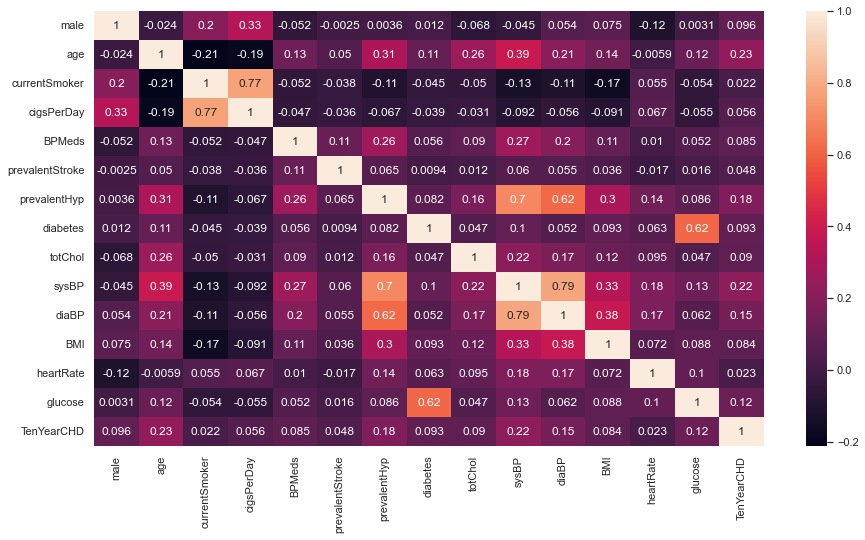

In [19]:
plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True)
plt

In [21]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [22]:
#define the features
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

forest = RandomForestClassifier(n_estimators=1000, n_jobs= 1, class_weight='balanced')

#define Boruta feature selection
feat_selector = BorutaPy(forest, n_estimators= 'auto', verbose=2)

#find all relevant features
feat_selector.fit(x,y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	9
Iteration:

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=24, n_jobs=1,
                                          random_state=RandomState(MT19937) at 0x2817972B740),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2817972B740, verbose=2)

In [23]:
most_important = data.columns[:-1][feat_selector.support_].tolist()
most_important

['age', 'sysBP']

In [24]:
top_features = data.columns[:-1][feat_selector.ranking_ <=6].tolist()
top_features

['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

In [25]:
import statsmodels.api as sm

In [26]:
X_top = data[top_features]
y = data['TenYearCHD']

In [27]:
res = sm.Logit(y,X_top).fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.416958
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3744
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Sep 2021   Pseudo R-squ.:                 0.02354
Time:                        03:10:03   Log-Likelihood:                -1564.0
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.174e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0223      0.006      3.982      0.000       0.011       0.033
totChol       -0.0029      0.001     -2.716      0.007      -0.005      -0.001
sysBP          0.0245      0.003      7.436      0.000       0.018       0.031
diaBP         -0.0270      0.006     -4.603      0.000      -0.038      -0.015
BMI           -0.0499      0.012     -4.185      0.000      -0.073      -0.027
heartRate     -0.0298      0.004     -8.064      0.000      -0.037      -0.023
glucose        0.0043      0.002      2.616      0.009       0.001       0.007
==============================================================================
"""

In [28]:
params = res.params
conf = res.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                 5%       95%  Odds Ratio
age        1.011381  1.033813    1.022536
totChol    0.994963  0.999184    0.997071
sysBP      1.018236  1.031493    1.024843
diaBP      0.962258  0.984627    0.973378
BMI        0.929304  0.973798    0.951291
heartRate  0.963690  0.977730    0.970685
glucose    1.001074  1.007518    1.004291


In [29]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [30]:
X = data[top_features]
y = data.iloc[:,-1]

In [31]:
# the numbers before smote
num_before = dict(Counter(y))

#perform smoting

# define pipeline
over = SMOTE(sampling_strategy=0.8)
under = RandomUnderSampler(sampling_strategy=0.8)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X_smote, y_smote = pipeline.fit_resample(X, y)


#the numbers after smote
num_after =dict(Counter(y_smote))

In [32]:
print(num_before, num_after)

{0: 3179, 1: 572} {0: 3178, 1: 2543}


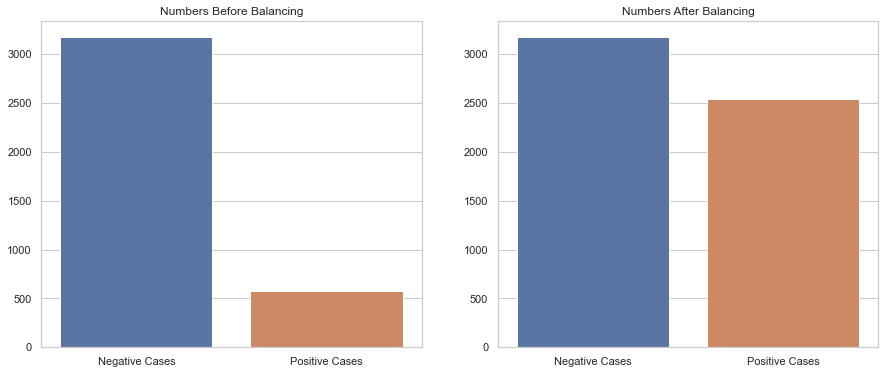

In [33]:
labels = ["Negative Cases","Positive Cases"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(labels, list(num_before.values()))
plt.title("Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(labels, list(num_after.values()))
plt.title("Numbers After Balancing")
plt.show()

In [34]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_smote), pd.DataFrame(y_smote)], axis=1)
new_data.columns = ['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose','TenYearCHD']
new_data.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,59,260.0,162.5,105.0,24.39,75.0,72.0,0
1,49,305.0,135.0,89.0,25.04,62.0,117.0,0
2,48,232.0,130.5,90.0,29.07,85.0,118.0,0
3,36,212.0,168.0,98.0,29.77,72.0,75.0,0
4,41,205.0,110.0,69.0,25.99,75.0,67.0,0


In [35]:
X_new = new_data[top_features]
y_new= new_data.iloc[:,-1]
X_new.head()

,age,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,59,260.0,162.5,105.0,24.39,75.0,72.0
1,49,305.0,135.0,89.0,25.04,62.0,117.0
2,48,232.0,130.5,90.0,29.07,85.0,118.0
3,36,212.0,168.0,98.0,29.77,72.0,75.0
4,41,205.0,110.0,69.0,25.99,75.0,67.0


In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y_new,test_size=.2,random_state=42)

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled)

X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score,precision_score,classification_report,roc_auc_score,roc_curve

In [40]:
# search for optimun parameters using gridsearch
params = {'penalty':['l1','l2'],
         'C':[0.01,0.1,1,10,100],
         'class_weight':['balanced',None]}
logistic_clf = GridSearchCV(LogisticRegression(),param_grid=params,cv=10)

In [41]:
#train the classifier
logistic_clf.fit(X_train,y_train)

logistic_clf.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}

In [42]:
#make predictions
logistic_predict = logistic_clf.predict(X_test)

In [43]:
log_accuracy = accuracy_score(y_test,logistic_predict)
print(f"Using logistic regression we get an accuracy of {round(log_accuracy*100,2)}%")

Using logistic regression we get an accuracy of 66.29%


<AxesSubplot:>

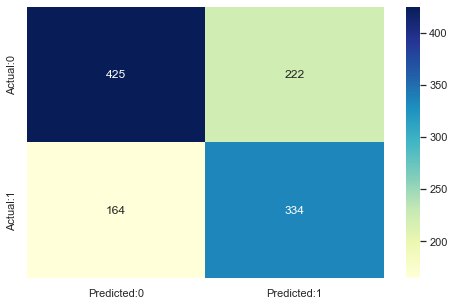

In [44]:
cm=confusion_matrix(y_test,logistic_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [45]:
print(classification_report(y_test,logistic_predict))

              precision    recall  f1-score   support

           0       0.72      0.66      0.69       647
           1       0.60      0.67      0.63       498

    accuracy                           0.66      1145
   macro avg       0.66      0.66      0.66      1145
weighted avg       0.67      0.66      0.66      1145



In [46]:
logistic_f1 = f1_score(y_test, logistic_predict)
print(f'The f1 score for logistic regression is {round(logistic_f1*100,2)}%')

The f1 score for logistic regression is 63.38%


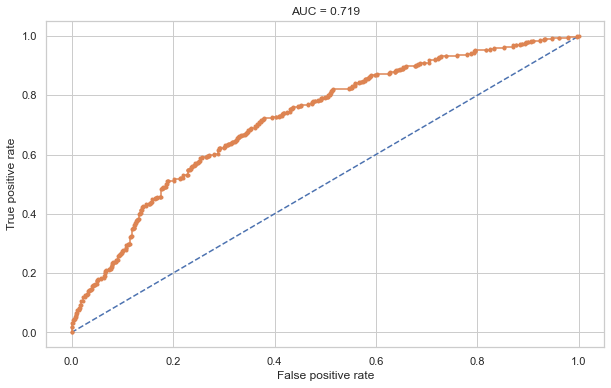

In [47]:
# ROC curve and AUC 
probs = logistic_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
log_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(log_auc,3)}")
plt.show()

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
# search for optimun parameters using gridsearch
params= {'n_neighbors': np.arange(1, 10)}
grid_search = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = params, 
                           scoring = 'accuracy', cv = 10, n_jobs = -1)
knn_clf = GridSearchCV(KNeighborsClassifier(),params,cv=3, n_jobs=-1)

In [50]:
# train the model
knn_clf.fit(X_train,y_train)
knn_clf.best_params_ 

{'n_neighbors': 2}

In [51]:
# predictions
knn_predict = knn_clf.predict(X_test)

In [52]:
#accuracy
knn_accuracy = accuracy_score(y_test,knn_predict)
print(f"Using k-nearest neighbours we get an accuracy of {round(knn_accuracy*100,2)}%")

Using k-nearest neighbours we get an accuracy of 84.28%


<AxesSubplot:>

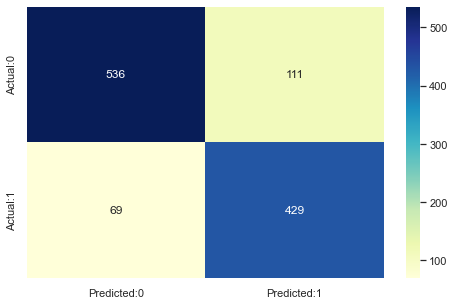

In [53]:
cm=confusion_matrix(y_test,knn_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [54]:
print(classification_report(y_test,knn_predict))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       647
           1       0.79      0.86      0.83       498

    accuracy                           0.84      1145
   macro avg       0.84      0.84      0.84      1145
weighted avg       0.85      0.84      0.84      1145



In [55]:
knn_f1 = f1_score(y_test, knn_predict)
print(f'The f1 score for K nearest neignbours is {round(knn_f1*100,2)}%')

The f1 score for K nearest neignbours is 82.66%


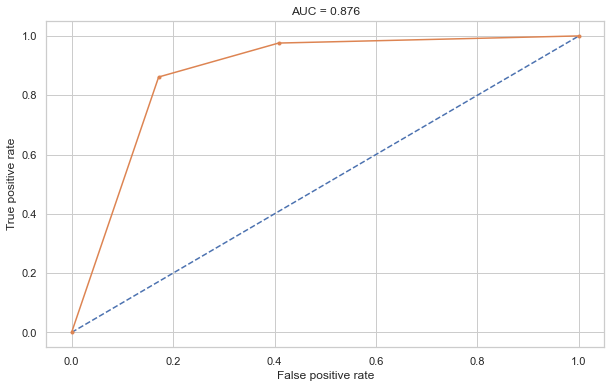

In [56]:
# ROC curve and AUC 
probs = knn_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
knn_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(knn_auc,3)}")
plt.show()

In [57]:
from sklearn.tree import DecisionTreeClassifier
dtree= DecisionTreeClassifier(random_state=7)

In [58]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11]}
tree_clf = GridSearchCV(dtree, param_grid=params, n_jobs=-1)

In [59]:
# train the model
tree_clf.fit(X_train,y_train)
tree_clf.best_params_ 

{'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10}

In [60]:
tree_predict = tree_clf.predict(X_test)

In [61]:
#accuracy
tree_accuracy = accuracy_score(y_test,tree_predict)
print(f"Using Decision Trees we get an accuracy of {round(tree_accuracy*100,2)}%")

Using Decision Trees we get an accuracy of 75.2%


<AxesSubplot:>

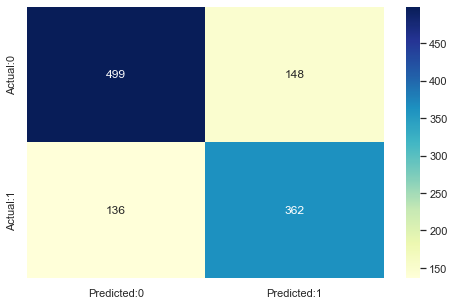

In [62]:
cm=confusion_matrix(y_test,tree_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [63]:
print(classification_report(y_test,tree_predict))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       647
           1       0.71      0.73      0.72       498

    accuracy                           0.75      1145
   macro avg       0.75      0.75      0.75      1145
weighted avg       0.75      0.75      0.75      1145



In [64]:
tree_f1 = f1_score(y_test, tree_predict)
print(f'The f1 score Descision trees is {round(tree_f1*100,2)}%')

The f1 score Descision trees is 71.83%


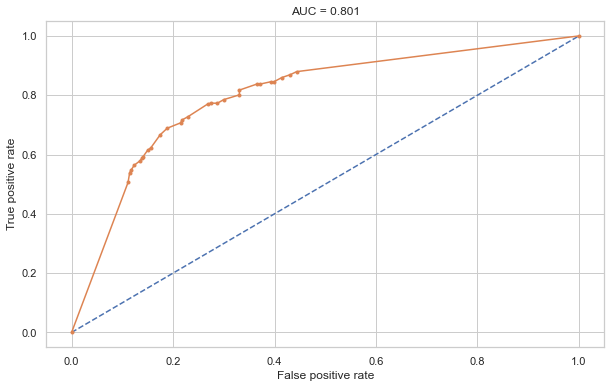

In [65]:
# ROC curve and AUC 
probs = tree_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
tree_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(tree_auc,3)}")
plt.show()

In [66]:
from sklearn.svm import SVC

In [67]:
#grid search for optimum parameters
Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
param_grid = {'C': Cs, 'gamma' : gammas}
svm_clf = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid, cv=10)

In [68]:
# train the model
svm_clf.fit(X_train,y_train)
svm_clf.best_params_ 

{'C': 10, 'gamma': 1}

In [69]:
svm_predict = svm_clf.predict(X_test)
#accuracy
svm_accuracy = accuracy_score(y_test,svm_predict)
print(f"Using SVM we get an accuracy of {round(svm_accuracy*100,2)}%")

Using SVM we get an accuracy of 85.85%


<AxesSubplot:>

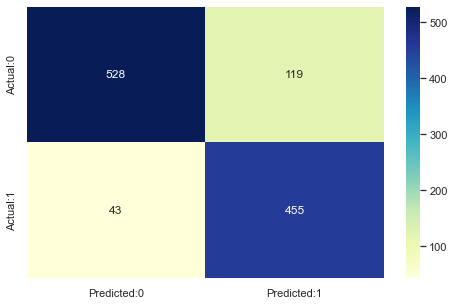

In [70]:
cm=confusion_matrix(y_test,svm_predict)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [71]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87       647
           1       0.79      0.91      0.85       498

    accuracy                           0.86      1145
   macro avg       0.86      0.86      0.86      1145
weighted avg       0.87      0.86      0.86      1145



In [72]:
svm_f1 = f1_score(y_test, svm_predict)
print(f'The f1 score for SVM is {round(svm_f1*100,2)}%')

The f1 score for SVM is 84.89%


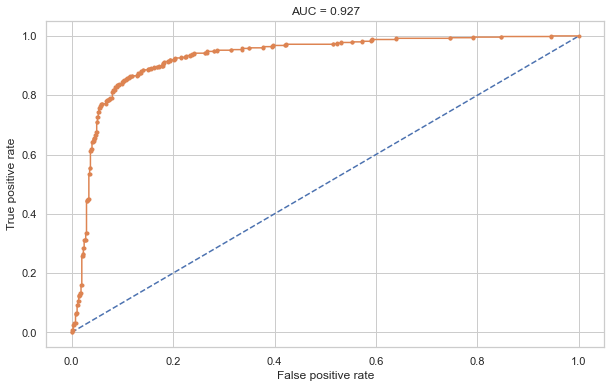

In [73]:
# ROC curve and AUC 
probs = svm_clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
svm_auc = roc_auc_score(y_test, probs)

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC = {round(svm_auc,3)}")
plt.show()

In [74]:
comparison = pd.DataFrame({
    "Logistic regression":{'Accuracy':log_accuracy, 'AUC':log_auc, 'F1 score':logistic_f1},
    "K-nearest neighbours":{'Accuracy':knn_accuracy, 'AUC':knn_auc, 'F1 score':knn_f1},
    "Decision trees":{'Accuracy':tree_accuracy, 'AUC':tree_auc, 'F1 score':tree_f1},
    "Support vector machine":{'Accuracy':svm_accuracy, 'AUC':svm_auc, 'F1 score':svm_f1}
}).T

In [75]:
comparison

,Accuracy,AUC,F1 score
Logistic regression,0.662882,0.719378,0.633776
K-nearest neighbours,0.842795,0.875971,0.826590
Decision trees,0.751965,0.800736,0.718254
Support vector machine,0.858515,0.927241,0.848881


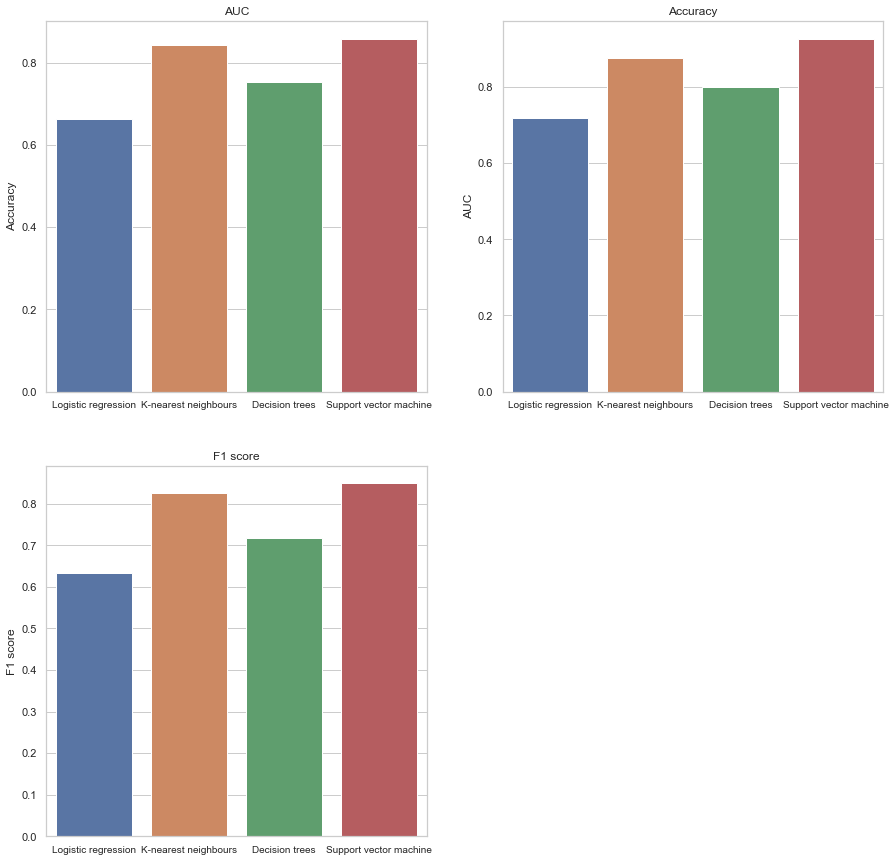

In [76]:
fig = plt.gcf()
fig.set_size_inches(15, 15)
titles = ['AUC','Accuracy','F1 score']
for title,label in enumerate(comparison.columns):
    plt.subplot(2,2,title+1)
    sns.barplot(x=comparison.index, y = comparison[label], data=comparison)
    plt.xticks(fontsize=10)
    plt.title(titles[title])
plt.show()